<a href="https://colab.research.google.com/github/overclock98/PSB-2015-crowdsourced-nuclei-dataset-to-coco/blob/master/PSB_2015_crowdsourced_nuclei_dataset_to_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://s3-us-west-2.amazonaws.com/crowdflowerjobs/PSB_2015_CrowdSourcingNucleiAnnotation.rar

--2020-08-29 07:27:03--  https://s3-us-west-2.amazonaws.com/crowdflowerjobs/PSB_2015_CrowdSourcingNucleiAnnotation.rar
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.176.64
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.176.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252198007 (241M) [application/octet-stream]
Saving to: ‘PSB_2015_CrowdSourcingNucleiAnnotation.rar’

PSB_2015_CrowdSourc 100%[===================>] 240.51M  35.8MB/s    in 7.3s    

2020-08-29 07:27:10 (32.8 MB/s) - ‘PSB_2015_CrowdSourcingNucleiAnnotation.rar’ saved [252198007/252198007]



In [ ]:
!unrar x PSB_2015_CrowdSourcingNucleiAnnotation.rar

Streaming output truncated to the last 5000 lines.
Extracting  PSB_2015_ImageSize_400/Nuclei_Segmentation/ContributorsLevel_2_AggregationLevel_5_537919/26900_11400_ConfidenceMap.png       4%  OK 
Extracting  PSB_2015_ImageSize_400/Nuclei_Segmentation/ContributorsLevel_2_AggregationLevel_5_537919/31200_36200_ConfidenceMap.png       4%  OK 
Extracting  PSB_2015_ImageSize_400/Nuclei_Segmentation/ContributorsLevel_2_AggregationLevel_5_537919/31200_34200_ConfidenceMap.png       4%  OK 
Extracting  PSB_2015_ImageSize_400/Nuclei_Segmentation/ContributorsLevel_2_AggregationLevel_5_537919/14800_22600_ConfidenceMap.png       4%  OK 
Extracting  PSB_2015_ImageSize_400/Nuclei_Segmentation/ContributorsLevel_2_AggregationLevel_5_537919/30000_33800_ConfidenceMap.png       4%  OK 
Extracting  PSB_2015_ImageSize_400/Nuclei_Segmentation/ContributorsLevel_2_AggregationLevel_5_537919/30400_33400_ConfidenceMap.png       4%  OK 
Extracting  PSB_2015_Imag

In [ ]:
!pip install git+git://github.com/waspinator/coco.git@2.1.0

  Cloning git://github.com/waspinator/coco.git (to revision 2.1.0) to /tmp/pip-req-build-mxad0lf4
  Running command git clone -q git://github.com/waspinator/coco.git /tmp/pip-req-build-mxad0lf4
  Running command git checkout -q cd69b031a5dafdd40c0b2c52bd4a9c5d7f11382e
  Created wheel for pycocotools: filename=pycocotools-2.1-cp36-cp36m-linux_x86_64.whl size=285467 sha256=e94d45f1bce1860b9fa0f66b954d5f0fde9893118fe06b8045522aeff988839e
  Stored in directory: /tmp/pip-ephem-wheel-cache-iiay_sbu/wheels/42/68/4d/0ae439f3aece2e517244d3194de0db684e0e3d3b73bdbd5533
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.1
    Uninstalling pycocotools-2.0.1:
      Successfully uninstalled pycocotools-2.0.1


In [ ]:
#!git clone https://github.com/waspinator/pycococreator.git
!git clone https://github.com/TathyaEarth/pycococreator.git

Cloning into 'pycococreator'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 185 (delta 6), reused 11 (delta 2), pack-reused 165
Receiving objects: 100% (185/185), 188.00 KiB | 7.83 MiB/s, done.
Resolving deltas: 100% (80/80), done.


In [ ]:
!mkdir /content/pycococreator/psb_dataset
!mkdir /content/pycococreator/psb_dataset/Original_Images

In [ ]:
cd /content/PSB_2015_ImageSize_400/Nuclei_Segmentation/Experts_524886

/content/PSB_2015_ImageSize_400/Nuclei_Segmentation/Experts_524886


In [ ]:
import shutil
import glob

for name in glob.glob('*.png'):
    #im = Image.open(name)
    name = str(name).rstrip("_ConfidenceMap.png")
    source = "/content/PSB_2015_ImageSize_400/Original_Images/"+name+".tiff"
    destination = "/content/pycococreator/psb_dataset/Original_Images/"+name+".tiff"
    dest = shutil.copyfile(source, destination)

In [ ]:
cd /content/pycococreator/psb_dataset/Original_Images

/content/pycococreator/psb_dataset/Original_Images


In [ ]:
from PIL import Image
import glob

for name in glob.glob('*.tiff'):
    im = Image.open(name)
    name = str(name).rstrip(".tiff")
    im.save(name + '.png', 'PNG')

In [ ]:
!rm *tiff

In [ ]:
len(glob.glob('/content/pycococreator/psb_dataset/Original_Images/*.png'))

462

In [ ]:
!mkdir /content/pycococreator/psb_dataset/Original_Images/class_1

In [ ]:
!mv /content/pycococreator/psb_dataset/Original_Images/*.png /content/pycococreator/psb_dataset/Original_Images/class_1/

In [ ]:
len(glob.glob('/content/pycococreator/psb_dataset/Original_Images/class_1/*.png'))

462

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders
splitfolders.ratio("/content/pycococreator/psb_dataset/Original_Images", output="/content/pycococreator/psb_dataset", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 462 files [00:00, 2060.47 files/s]


In [ ]:
!mv /content/pycococreator/psb_dataset/train/class_1/* /content/pycococreator/psb_dataset/train/
!rm -r /content/pycococreator/psb_dataset/train/class_1
!mv /content/pycococreator/psb_dataset/val/class_1/* /content/pycococreator/psb_dataset/val/
!rm -r /content/pycococreator/psb_dataset/val/class_1
!mv /content/pycococreator/psb_dataset/val/ /content/pycococreator/psb_dataset/test/

In [ ]:
!mkdir /content/pycococreator/psb_dataset/test_ann
!mkdir /content/pycococreator/psb_dataset/train_ann

In [ ]:
ls /content/pycococreator/psb_dataset

Original_Images/  test/  test_ann/  train/  train_ann/


In [ ]:
cd /content/pycococreator/psb_dataset/test

/content/pycococreator/psb_dataset/test


In [ ]:
import shutil
import glob

for name in glob.glob('*.png'):
    #im = Image.open(name)
    name = str(name).rstrip(".png")
    source = "/content/PSB_2015_ImageSize_400/Nuclei_Segmentation/Experts_524886/"+name+"_ConfidenceMap.png"
    destination = "/content/pycococreator/psb_dataset/test_ann/"+name+"_ConfidenceMap.png"
    dest = shutil.copyfile(source, destination)

In [ ]:
%cd /content/pycococreator/psb_dataset/train

for name in glob.glob('*.png'):
    #im = Image.open(name)
    name = str(name).rstrip(".png")
    source = "/content/PSB_2015_ImageSize_400/Nuclei_Segmentation/Experts_524886/"+name+"_ConfidenceMap.png"
    destination = "/content/pycococreator/psb_dataset/train_ann/"+name+"_ConfidenceMap.png"
    dest = shutil.copyfile(source, destination)

/content/pycococreator/psb_dataset/train


In [ ]:
print(len(glob.glob('/content/pycococreator/psb_dataset/train_ann/*.png')))
print(len(glob.glob('/content/pycococreator/psb_dataset/train/*.png')))
print(len(glob.glob('/content/pycococreator/psb_dataset/test/*.png')))
print(len(glob.glob('/content/pycococreator/psb_dataset/test_ann/*.png')))

369
369
93
93


In [ ]:
!rm -r /content/pycococreator/psb_dataset/Original_Images

In [ ]:
ls /content/pycococreator/psb_dataset

test/  test_ann/  train/  train_ann/


In [ ]:
cd /content/pycococreator

/content/pycococreator


In [ ]:
import datetime
import json
import os
import re
import fnmatch
from PIL import Image
import numpy as np
from pycococreatortools import pycococreatortools

In [ ]:
ROOT_DIR = 'psb_dataset'
IMAGE_DIR = os.path.join(ROOT_DIR, "train")
ANNOTATION_DIR = os.path.join(ROOT_DIR, "train_ann")

INFO = {
    "description": "Example Dataset",
    "url": "https://github.com/waspinator/pycococreator",
    "version": "0.1.0",
    "year": 2018,
    "contributor": "waspinator",
    "date_created": datetime.datetime.utcnow().isoformat(' ')
}

LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 1,
        'name': 'ConfidenceMap',
        'supercategory': 'shape',
    },
]
def filter_for_jpeg(root, files):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    
    return files

def filter_for_annotations(root, files, image_filename):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    basename_no_extension = os.path.splitext(os.path.basename(image_filename))[0]
    file_name_prefix = basename_no_extension + '.*'
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    files = [f for f in files if re.match(file_name_prefix, os.path.splitext(os.path.basename(f))[0])]

    return files

def gen_coco_json():

    coco_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

    image_id = 1
    segmentation_id = 1
    
    # filter for jpeg images
    for root, _, files in os.walk(IMAGE_DIR):
        image_files = filter_for_jpeg(root, files)

        # go through each image
        for image_filename in image_files:
            image = Image.open(image_filename)
            image_info = pycococreatortools.create_image_info(
                image_id, os.path.basename(image_filename), image.size)
            coco_output["images"].append(image_info)

            # filter for associated png annotations
            for root, _, files in os.walk(ANNOTATION_DIR):
                annotation_files = filter_for_annotations(root, files, image_filename)

                # go through each associated annotation
                for annotation_filename in annotation_files:
                    
                    #print(annotation_filename)
                    class_id = [x['id'] for x in CATEGORIES if x['name'] in annotation_filename][0]

                    category_info = {'id': class_id, 'is_crowd': 'crowd' in image_filename}
                    binary_mask = np.asarray(Image.open(annotation_filename)
                        .convert('1')).astype(np.uint8)
                    
                    annotation_info = pycococreatortools.create_annotation_infos(
                        segmentation_id, image_id, category_info, binary_mask,
                        image.size, tolerance=2)

                    if annotation_info is not None:
                        coco_output["annotations"].append(annotation_info)

                    segmentation_id = segmentation_id + 1

            image_id = image_id + 1
            #print(annotation_info)
            #if(image_id == 3): break

    with open('{}/train.json'.format(ROOT_DIR), 'w') as output_json_file:
        json.dump(coco_output, output_json_file)


gen_coco_json()

In [ ]:
ROOT_DIR = 'psb_dataset'
IMAGE_DIR = os.path.join(ROOT_DIR, "test")
ANNOTATION_DIR = os.path.join(ROOT_DIR, "test_ann")

INFO = {
    "description": "Example Dataset",
    "url": "https://github.com/waspinator/pycococreator",
    "version": "0.1.0",
    "year": 2018,
    "contributor": "waspinator",
    "date_created": datetime.datetime.utcnow().isoformat(' ')
}

LICENSES = [
    {
        "id": 1,
        "name": "Attribution-NonCommercial-ShareAlike License",
        "url": "http://creativecommons.org/licenses/by-nc-sa/2.0/"
    }
]

CATEGORIES = [
    {
        'id': 1,
        'name': 'ConfidenceMap',
        'supercategory': 'shape',
    },
]
def filter_for_jpeg(root, files):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    
    return files

def filter_for_annotations(root, files, image_filename):
    file_types = ['*.png']
    file_types = r'|'.join([fnmatch.translate(x) for x in file_types])
    basename_no_extension = os.path.splitext(os.path.basename(image_filename))[0]
    file_name_prefix = basename_no_extension + '.*'
    files = [os.path.join(root, f) for f in files]
    files = [f for f in files if re.match(file_types, f)]
    files = [f for f in files if re.match(file_name_prefix, os.path.splitext(os.path.basename(f))[0])]

    return files

def gen_coco_json():

    coco_output = {
        "info": INFO,
        "licenses": LICENSES,
        "categories": CATEGORIES,
        "images": [],
        "annotations": []
    }

    image_id = 1
    segmentation_id = 1
    
    # filter for jpeg images
    for root, _, files in os.walk(IMAGE_DIR):
        image_files = filter_for_jpeg(root, files)

        # go through each image
        for image_filename in image_files:
            image = Image.open(image_filename)
            image_info = pycococreatortools.create_image_info(
                image_id, os.path.basename(image_filename), image.size)
            coco_output["images"].append(image_info)

            # filter for associated png annotations
            for root, _, files in os.walk(ANNOTATION_DIR):
                annotation_files = filter_for_annotations(root, files, image_filename)

                # go through each associated annotation
                for annotation_filename in annotation_files:
                    
                    #print(annotation_filename)
                    class_id = [x['id'] for x in CATEGORIES if x['name'] in annotation_filename][0]

                    category_info = {'id': class_id, 'is_crowd': 'crowd' in image_filename}
                    binary_mask = np.asarray(Image.open(annotation_filename)
                        .convert('1')).astype(np.uint8)
                    
                    annotation_info = pycococreatortools.create_annotation_infos(
                        segmentation_id, image_id, category_info, binary_mask,
                        image.size, tolerance=2)

                    if annotation_info is not None:
                        coco_output["annotations"].append(annotation_info)

                    segmentation_id = segmentation_id + 1

            image_id = image_id + 1

    with open('{}/test.json'.format(ROOT_DIR), 'w') as output_json_file:
        json.dump(coco_output, output_json_file)

gen_coco_json()

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

In [ ]:
image_directory = '/content/pycococreator/psb_dataset/train/'
annotation_file = '/content/pycococreator/psb_dataset/train.json'

In [ ]:
example_coco = COCO(annotation_file)

loading annotations into memory...
Done (t=0.11s)
creating index...


TypeError: ignored

In [ ]:

categories = example_coco.loadCats(example_coco.getCatIds())
category_names = [category['name'] for category in categories]
print('Custom COCO categories: \n{}\n'.format(' '.join(category_names)))

category_names = set([category['supercategory'] for category in categories])
print('Custom COCO supercategories: \n{}'.format(' '.join(category_names)))

Custom COCO categories: 
ConfidenceMap

Custom COCO supercategories: 
shape


In [ ]:
category_ids = example_coco.getCatIds(catNms=['ConfidenceMap'])
image_ids = example_coco.getImgIds(catIds=category_ids)
image_data = example_coco.loadImgs(image_ids[np.random.randint(0, len(image_ids))])[0]

In [ ]:
image_data

{'coco_url': '',
 'date_captured': '2020-08-29 07:28:07.160619',
 'file_name': '30800_36200.png',
 'flickr_url': '',
 'height': 400,
 'id': 128,
 'license': 1,
 'width': 400}

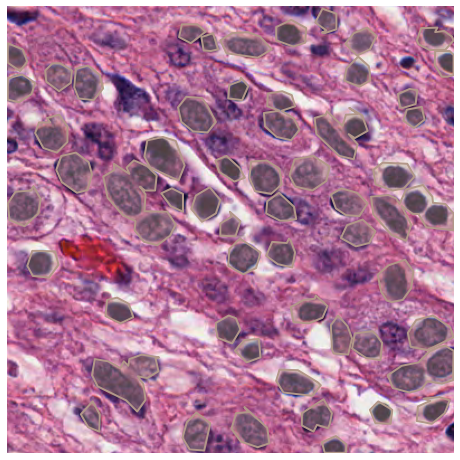

In [ ]:
image = io.imread(image_directory + image_data['file_name'])
plt.imshow(image); plt.axis('off')
pylab.rcParams['figure.figsize'] = (8.0, 10.0)
annotation_ids = example_coco.getAnnIds(imgIds=image_data['id'], catIds=category_ids, iscrowd=None)
annotations = example_coco.loadAnns(annotation_ids)
example_coco.showAnns(annotations)

In [ ]:
*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp -r /content/pycococreator/psb_dataset "/content/drive/My Drive/Colab Notebooks/Datasets"